# Deep Learning Facial Detector 
#### By : Hala Alenazi & Aishah Alanazi & yaqeen Alhawaj & Hussain Alsultan & Shaikha Alotaibi .



 ## __Contents:__
> 1. Import Libraries
> 2. Data Reading and Splitting
> 3. Data Visualization
> 4. Data Augmentation
> 5. Model Metrics
> 6. Model Training
> 7. Baseline Models
>> 1. Simple Neural Network Baseline
>> 2. Neural Network Baseline
>> 3. Simple Convolutional Neural Network Baseline
> 8. Convolutional Neural Network Model
> 9. Transfer Learning
>> 1. DenseNet
>> 2. VGG-16
>> 3. VGG-19
>> 4. InceptionV3
>> 5. ResNet50



### Library Imports

In [2]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from tensorflow.keras import regularizers as reg
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.layers import Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, GlobalAveragePooling2D, InputLayer, Dropout, SpatialDropout2D, BatchNormalization, Resizing, Rescaling, RandomFlip, RandomRotation

### Data Reading and Splitting

In [3]:
# Image Configuration 
batch_size = 32
img_height = 180
img_width = 180

# Images Dirs 
train_dir = 'Data/face_dataset/train'
valid_dir = 'Data/face_dataset/validation'
test_dir = 'Data/face_dataset/test'

In [5]:
# Getting train , test , validate Images from our dirs 
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

valid_data = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1489 files belonging to 9 classes.
Found 164 files belonging to 9 classes.
Found 171 files belonging to 9 classes.


### Data Visualization

In [6]:
class_names = train_data.class_names
num_classes = len(class_names)
print(class_names)

['pins_Adriana Lima', 'pins_Alexandra Daddario', 'pins_Alvaro Morte', 'pins_Anne Hathaway', 'pins_Anthony Mackie', 'pins_Ben Affleck', 'pins_Bill Gates', 'pins_amber heard', 'pins_barack obama']


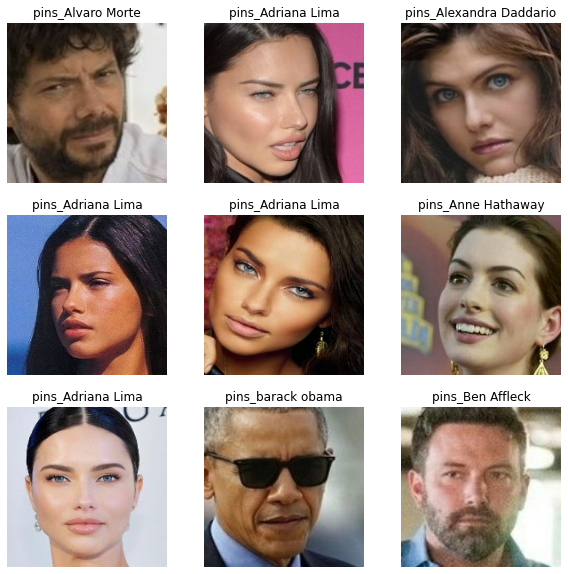

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
labels = []
for folder in os.listdir('Data/face_dataset/train'):
    emotion = os.fsdecode(folder)
    for file in os.listdir(f'Data/face_dataset/train/{emotion}'):
        labels.append(emotion)

### Data Augmentation

- Resize the images (180x180)
- Scaling/Normalization (1 to 255)
- Randomly flip images (Horizontally)
- Randomly rotate images (up to 20°)

In [9]:
data_augmentation = Sequential([
    Resizing(img_width, img_height),
    Rescaling(1./255),
    RandomFlip("horizontal"),
    RandomRotation(0.2)
])

### Model Metrics

In [10]:
def plot_model_performance(hist, model_name=None, save=False):
    model_hist = pd.DataFrame(hist.history)
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=model_hist[['accuracy', 'val_accuracy']])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'])
    
    if save and model_name:
        plt.title(f'{model_name} Accuracy Graph')
        plt.savefig(f'Data/{model_name} accuracy graph.png', transparent=True, bbox_inches='tight')

### Model Training

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

##### Simple Neural Network Baseline

In [11]:
sbase_NN = Sequential()

sbase_NN.add(data_augmentation)

sbase_NN.add(Dense(16, activation='relu'))

sbase_NN.add(Flatten())
sbase_NN.add(Dense(9, activation='softmax'))

sbase_NN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
sbase_NN_hist = sbase_NN.fit(train_data, epochs=5, validation_data=valid_data, verbose=1)

Epoch 1/5
47/47 [==============================] - 6s 109ms/step - loss: 21.1888 - accuracy: 0.2069 - val_loss: 7.4821 - val_accuracy: 0.2927
Epoch 2/5
47/47 [==============================] - 4s 93ms/step - loss: 5.7647 - accuracy: 0.2794 - val_loss: 5.6036 - val_accuracy: 0.2927
Epoch 3/5
47/47 [==============================] - 4s 93ms/step - loss: 4.1888 - accuracy: 0.3136 - val_loss: 3.1075 - val_accuracy: 0.4268
Epoch 4/5
47/47 [==============================] - 4s 93ms/step - loss: 2.4991 - accuracy: 0.3774 - val_loss: 2.0241 - val_accuracy: 0.4634
Epoch 5/5
47/47 [==============================] - 4s 92ms/step - loss: 2.0072 - accuracy: 0.4164 - val_loss: 1.8401 - val_accuracy: 0.4573


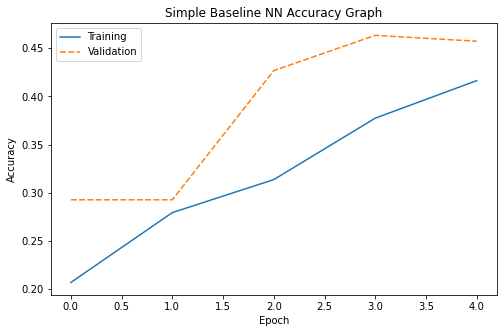

In [13]:
plot_model_performance(sbase_NN_hist, 'Simple Baseline NN', save=True)

In [14]:
train_loss, train_acc = sbase_NN.evaluate(train_data, verbose=1)
valid_loss, valid_acc = sbase_NN.evaluate(valid_data, verbose=1)

print(f'\n\nTraining Accuracy:\t{train_acc * 100}\nTraining Loss:\t\t{train_loss}\n')
print(f'Validation Accuracy:\t{valid_acc * 100}\nValidation Loss:\t{valid_loss}\n')
print('Train/Validation Diff:\t', (train_acc - valid_acc) * 100)

6/6 [==============================] - 0s 27ms/step - loss: 1.8401 - accuracy: 0.4573


Training Accuracy:	42.37743318080902
Training Loss:		1.8418811559677124

Validation Accuracy:	45.73170840740204
Validation Loss:	1.8400799036026

Train/Validation Diff:	 -3.3542752265930176


##### Neural Network Baseline

In [15]:
base_NN = Sequential()

base_NN.add(data_augmentation)

base_NN.add(Dense(8, activation='relu'))

base_NN.add(Dense(16, activation='relu'))

base_NN.add(Dense(32, activation='relu'))

base_NN.add(Dense(64, activation='relu'))

base_NN.add(Dense(32, activation='relu'))

base_NN.add(Dense(16, activation='relu'))

base_NN.add(Flatten())
base_NN.add(Dense(9, activation='softmax'))

base_NN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
base_NN_hist = base_NN.fit(train_data, epochs=5, validation_data=valid_data, verbose=1)

Epoch 1/5
47/47 [==============================] - 32s 657ms/step - loss: 2.4382 - accuracy: 0.2069 - val_loss: 2.0082 - val_accuracy: 0.3110
Epoch 2/5
47/47 [==============================] - 31s 662ms/step - loss: 1.8611 - accuracy: 0.3190 - val_loss: 1.7798 - val_accuracy: 0.3659
Epoch 3/5
47/47 [==============================] - 31s 660ms/step - loss: 1.7759 - accuracy: 0.3398 - val_loss: 1.7065 - val_accuracy: 0.3902
Epoch 4/5
47/47 [==============================] - 31s 659ms/step - loss: 1.7126 - accuracy: 0.3855 - val_loss: 1.6346 - val_accuracy: 0.4085
Epoch 5/5
47/47 [==============================] - 31s 663ms/step - loss: 1.7094 - accuracy: 0.3922 - val_loss: 1.6234 - val_accuracy: 0.3963


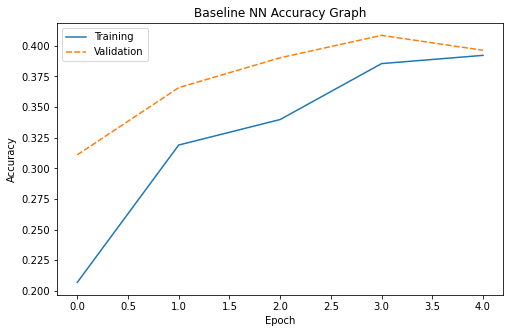

In [17]:
plot_model_performance(base_NN_hist, 'Baseline NN', save=True)

In [18]:
train_loss, train_acc = base_NN.evaluate(train_data, verbose=1)
valid_loss, valid_acc = base_NN.evaluate(valid_data, verbose=1)

print(f'\n\nTraining Accuracy:\t{train_acc * 100}\nTraining Loss:\t\t{train_loss}\n')
print(f'Validation Accuracy:\t{valid_acc * 100}\nValidation Loss:\t{valid_loss}\n')
print('Train/Validation Diff:\t', (train_acc - valid_acc) * 100)

6/6 [==============================] - 1s 232ms/step - loss: 1.6234 - accuracy: 0.3963


Training Accuracy:	41.63868427276611
Training Loss:		1.6033356189727783

Validation Accuracy:	39.6341472864151
Validation Loss:	1.6234138011932373

Train/Validation Diff:	 2.004536986351013


##### Simple Convolutional Neural Network Baseline

In [19]:
base_CNN = Sequential()

base_CNN.add(data_augmentation)

base_CNN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
base_CNN.add(MaxPooling2D())

base_CNN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
base_CNN.add(MaxPooling2D())

base_CNN.add(Flatten())
base_CNN.add(Dense(9, activation='softmax'))

base_CNN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
base_CNN_hist = base_CNN.fit(train_data, epochs=5, validation_data=valid_data, verbose=1)

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 2.1436 - accuracy: 0.1901 - val_loss: 1.9907 - val_accuracy: 0.2744
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 1.8353 - accuracy: 0.3271 - val_loss: 1.8471 - val_accuracy: 0.2805
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 1.6734 - accuracy: 0.3936 - val_loss: 1.5870 - val_accuracy: 0.3780
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 1.5504 - accuracy: 0.4298 - val_loss: 1.4417 - val_accuracy: 0.4695
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 1.5048 - accuracy: 0.4681 - val_loss: 1.3318 - val_accuracy: 0.4939


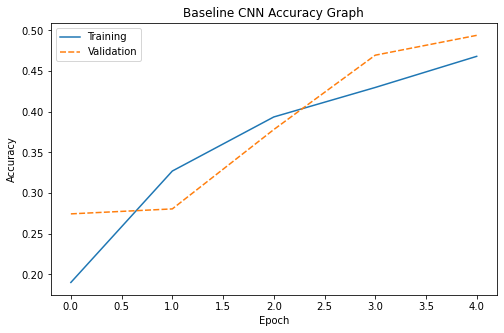

In [21]:
plot_model_performance(base_CNN_hist, 'Baseline CNN', save=True)

In [22]:
train_loss, train_acc = base_CNN.evaluate(train_data, verbose=1)
valid_loss, valid_acc = base_CNN.evaluate(valid_data, verbose=1)

print(f'\n\nTraining Accuracy:\t{train_acc * 100}\nTraining Loss:\t\t{train_loss}\n')
print(f'Validation Accuracy:\t{valid_acc * 100}\nValidation Loss:\t{valid_loss}\n')
print('Train/Validation Diff:\t', (train_acc - valid_acc) * 100)

6/6 [==============================] - 0s 29ms/step - loss: 1.3318 - accuracy: 0.4939


Training Accuracy:	52.585625648498535
Training Loss:		1.3286055326461792

Validation Accuracy:	49.390244483947754
Validation Loss:	1.3317511081695557

Train/Validation Diff:	 3.1953811645507812


##### Convolutional Neural Network Model

In [23]:
sgd_opt = SGD(learning_rate=0.001)

In [24]:
adam_opt = Adam(learning_rate=0.0001)

In [25]:
CNN = Sequential()

CNN.add(data_augmentation)

CNN.add(Conv2D(filters=32, strides=2, kernel_size=3, kernel_regularizer=reg.L2(), activation='relu', padding='same'))
CNN.add(SpatialDropout2D(0.4))
CNN.add(BatchNormalization())
CNN.add(Conv2D(filters=32, strides=2, kernel_size=3, kernel_regularizer=reg.L2(), activation='relu', padding='same'))
CNN.add(SpatialDropout2D(0.4))
CNN.add(BatchNormalization())

CNN.add(Conv2D(filters=64, strides=2, kernel_size=3, kernel_regularizer=reg.L2(), activation='relu', padding='same'))
CNN.add(SpatialDropout2D(0.4))
CNN.add(BatchNormalization())
CNN.add(Conv2D(filters=64, strides=2, kernel_size=3, kernel_regularizer=reg.L2(), activation='relu', padding='same'))
CNN.add(SpatialDropout2D(0.4))
CNN.add(BatchNormalization())

CNN.add(Conv2D(filters=128, strides=2, kernel_size=3, kernel_regularizer=reg.L2(), activation='relu', padding='same'))
CNN.add(SpatialDropout2D(0.4))
CNN.add(BatchNormalization())
CNN.add(Conv2D(filters=128, strides=2, kernel_size=3, kernel_regularizer=reg.L2(), activation='relu', padding='same'))
CNN.add(SpatialDropout2D(0.4))
CNN.add(BatchNormalization())

CNN.add(Conv2D(filters=256, strides=2, kernel_size=3, kernel_regularizer=reg.L2(), activation='relu', padding='same'))
CNN.add(SpatialDropout2D(0.4))
CNN.add(BatchNormalization())

CNN.add(GlobalAveragePooling2D())

CNN.add(Dense(9, activation='softmax'))

CNN.compile(loss='sparse_categorical_crossentropy', optimizer=adam_opt, metrics=['accuracy'])

In [26]:
CNN_hist = CNN.fit(train_data, epochs=200, validation_data=valid_data, verbose=1, callbacks=[keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=.25, patience=4, verbose=1)])

Epoch 1/200
47/47 [==============================] - 11s 204ms/step - loss: 7.7879 - accuracy: 0.1216 - val_loss: 7.4059 - val_accuracy: 0.0976 - lr: 1.0000e-04
Epoch 2/200
47/47 [==============================] - 9s 198ms/step - loss: 7.6645 - accuracy: 0.1216 - val_loss: 7.3383 - val_accuracy: 0.0976 - lr: 1.0000e-04
Epoch 3/200
47/47 [==============================] - 9s 198ms/step - loss: 7.5851 - accuracy: 0.1222 - val_loss: 7.2745 - val_accuracy: 0.0976 - lr: 1.0000e-04
Epoch 4/200
47/47 [==============================] - 9s 199ms/step - loss: 7.4887 - accuracy: 0.1148 - val_loss: 7.2148 - val_accuracy: 0.0976 - lr: 1.0000e-04
Epoch 5/200
47/47 [==============================] - 9s 198ms/step - loss: 7.3980 - accuracy: 0.1283 - val_loss: 7.1612 - val_accuracy: 0.0976 - lr: 1.0000e-04
Epoch 6/200
47/47 [==============================] - 9s 198ms/step - loss: 7.3138 - accuracy: 0.1377 - val_loss: 7.0864 - val_accuracy: 0.1220 - lr: 1.0000e-04
Epoch 7/200
47/47 [====================

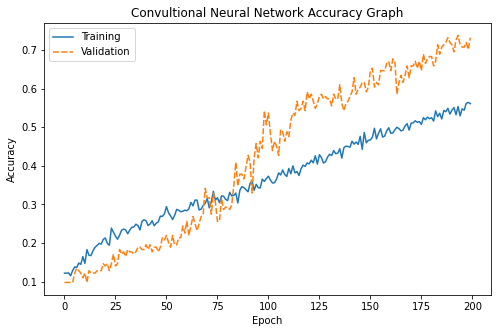

In [27]:
plot_model_performance(CNN_hist, 'Convultional Neural Network', save=True)

In [28]:
train_loss, train_acc = CNN.evaluate(train_data, verbose=1)
valid_loss, valid_acc = CNN.evaluate(valid_data, verbose=1)

print(f'\n\nTraining Accuracy:\t{train_acc * 100}\nTraining Loss:\t\t{train_loss}\n')
print(f'Validation Accuracy:\t{valid_acc * 100}\nValidation Loss:\t{valid_loss}\n')
print('Train/Validation Diff:\t', np.abs(train_acc - valid_acc) * 100)

6/6 [==============================] - 0s 34ms/step - loss: 1.3277 - accuracy: 0.7317


Training Accuracy:	73.33781123161316
Training Loss:		1.3057676553726196

Validation Accuracy:	73.17073345184326
Validation Loss:	1.3277301788330078

Train/Validation Diff:	 0.16707777976989746


In [29]:
CNN.save('Data/cnn_model.h5')

##### Transfer Learning

Using DenseNet

In [30]:
dense_net = DenseNet169(weights='imagenet', include_top=False, input_shape=None)

for layer in dense_net.layers:
    layer.trainable = False

In [31]:
CNN_dense_transfer = Sequential()

CNN_dense_transfer.add(dense_net)

CNN_dense_transfer.add(GlobalAveragePooling2D())

CNN_dense_transfer.add(Dense(256 , activation ='relu'))
CNN_dense_transfer.add(BatchNormalization())
CNN_dense_transfer.add(Dense(128 , activation ='relu'))
CNN_dense_transfer.add(BatchNormalization())

CNN_dense_transfer.add(Dense(9, activation='softmax'))

CNN_dense_transfer.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_opt, metrics = ['accuracy'])
CNN_dense_transfer.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, None, None, 1664)  12642880  
                                                                 
 global_average_pooling2d_1   (None, 1664)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_11 (Dense)            (None, 256)               426240    
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_8 (Batc  (None, 128)             

In [32]:
CNN_dense_transfer_hist = CNN_dense_transfer.fit(train_data, epochs=30, validation_data=valid_data, verbose=1)

Epoch 1/30
47/47 [==============================] - 62s 1s/step - loss: 2.6054 - accuracy: 0.1478 - val_loss: 2.8842 - val_accuracy: 0.1707
Epoch 2/30
47/47 [==============================] - 56s 1s/step - loss: 2.1730 - accuracy: 0.2492 - val_loss: 2.2794 - val_accuracy: 0.2073
Epoch 3/30
47/47 [==============================] - 56s 1s/step - loss: 1.9276 - accuracy: 0.3251 - val_loss: 1.9490 - val_accuracy: 0.2805
Epoch 4/30
47/47 [==============================] - 56s 1s/step - loss: 1.7367 - accuracy: 0.3915 - val_loss: 1.7584 - val_accuracy: 0.3780
Epoch 5/30
47/47 [==============================] - 55s 1s/step - loss: 1.6049 - accuracy: 0.4527 - val_loss: 1.6413 - val_accuracy: 0.4634
Epoch 6/30
47/47 [==============================] - 56s 1s/step - loss: 1.4964 - accuracy: 0.5050 - val_loss: 1.5563 - val_accuracy: 0.4695
Epoch 7/30
47/47 [==============================] - 56s 1s/step - loss: 1.4164 - accuracy: 0.5279 - val_loss: 1.4621 - val_accuracy: 0.5244
Epoch 8/30
47/47 [==

In [33]:
CNN_dense_transfer.save('Data/cnn_dense_model.h5')

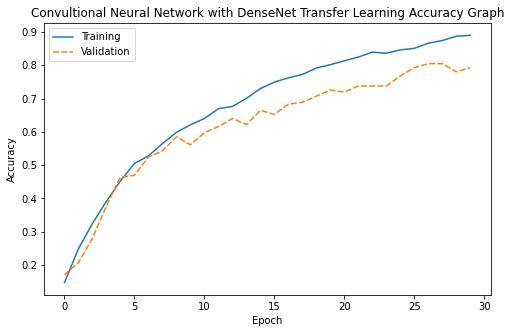

In [34]:
plot_model_performance(CNN_dense_transfer_hist, 'Convultional Neural Network with DenseNet Transfer Learning', save=True)

In [35]:
train_loss, train_acc = CNN_dense_transfer.evaluate(train_data, verbose=1)
valid_loss, valid_acc = CNN_dense_transfer.evaluate(valid_data, verbose=1)

print(f'\n\nTraining Accuracy:\t{train_acc * 100}\nTraining Loss:\t\t{train_loss}\n')
print(f'Validation Accuracy:\t{valid_acc * 100}\nValidation Loss:\t{valid_loss}\n')
print('Train/Validation Diff:\t', np.abs(train_acc - valid_acc) * 100)

6/6 [==============================] - 5s 882ms/step - loss: 0.8378 - accuracy: 0.7927


Training Accuracy:	76.96440815925598
Training Loss:		0.8496607542037964

Validation Accuracy:	79.2682945728302
Validation Loss:	0.8378303050994873

Train/Validation Diff:	 2.3038864135742188


Using VGG16

In [36]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=None)

for layer in vgg.layers:
    layer.trainable = False

In [37]:
CNN_vgg_transfer = Sequential()

CNN_vgg_transfer.add(data_augmentation)

CNN_vgg_transfer.add(vgg)

CNN_vgg_transfer.add(GlobalAveragePooling2D())

CNN_vgg_transfer.add(Dense(256 , activation ='relu'))
CNN_vgg_transfer.add(BatchNormalization())
CNN_vgg_transfer.add(Dense(256 , activation ='relu'))
CNN_vgg_transfer.add(BatchNormalization())

CNN_vgg_transfer.add(Dense(9, activation='softmax'))

CNN_vgg_transfer.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [38]:
CNN_vgg_transfer_hist = CNN_vgg_transfer.fit(train_data, epochs=30, validation_data=valid_data, verbose=1)

Epoch 1/30
47/47 [==============================] - 64s 1s/step - loss: 1.5170 - accuracy: 0.4869 - val_loss: 2.0238 - val_accuracy: 0.1890
Epoch 2/30
47/47 [==============================] - 63s 1s/step - loss: 0.9023 - accuracy: 0.6931 - val_loss: 1.8369 - val_accuracy: 0.3232
Epoch 3/30
47/47 [==============================] - 63s 1s/step - loss: 0.7079 - accuracy: 0.7529 - val_loss: 1.6723 - val_accuracy: 0.4695
Epoch 4/30
47/47 [==============================] - 63s 1s/step - loss: 0.6059 - accuracy: 0.8005 - val_loss: 1.1999 - val_accuracy: 0.6341
Epoch 5/30
47/47 [==============================] - 63s 1s/step - loss: 0.5618 - accuracy: 0.8039 - val_loss: 0.8735 - val_accuracy: 0.7500
Epoch 6/30
47/47 [==============================] - 64s 1s/step - loss: 0.4845 - accuracy: 0.8355 - val_loss: 0.6982 - val_accuracy: 0.7866
Epoch 7/30
47/47 [==============================] - 65s 1s/step - loss: 0.4404 - accuracy: 0.8388 - val_loss: 0.9346 - val_accuracy: 0.6463
Epoch 8/30
47/47 [==

In [39]:
CNN_vgg_transfer.save('Data/CNN_vgg_transfer.h5')

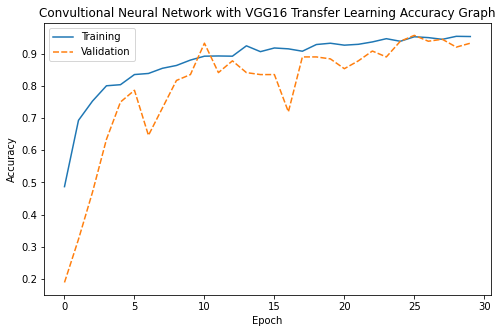

In [40]:
plot_model_performance(CNN_vgg_transfer_hist, 'Convultional Neural Network with VGG16 Transfer Learning', save=True)

In [41]:
train_loss, train_acc = CNN_vgg_transfer.evaluate(train_data, verbose=1)
valid_loss, valid_acc = CNN_vgg_transfer.evaluate(valid_data, verbose=1)

print(f'\n\nTraining Accuracy:\t{train_acc * 100}\nTraining Loss:\t\t{train_loss}\n')
print(f'Validation Accuracy:\t{valid_acc * 100}\nValidation Loss:\t{valid_loss}\n')
print('Train/Validation Diff:\t', np.abs(train_acc - valid_acc) * 100)

6/6 [==============================] - 6s 1s/step - loss: 0.1750 - accuracy: 0.9329


Training Accuracy:	88.98589611053467
Training Loss:		0.27690574526786804

Validation Accuracy:	93.29268336296082
Validation Loss:	0.17495518922805786

Train/Validation Diff:	 4.3067872524261475


Using VGG19

In [42]:
vgg_19 = VGG19(weights='imagenet', include_top=False, input_shape=None)

for layer in vgg_19.layers[:-2]:
    layer.trainable = False

In [43]:
CNN_vgg_19_transfer = Sequential()

CNN_vgg_19_transfer.add(data_augmentation)

CNN_vgg_19_transfer.add(vgg_19)

CNN_vgg_19_transfer.add(GlobalAveragePooling2D())

CNN_vgg_19_transfer.add(Dense(256 , activation ='relu'))
CNN_vgg_19_transfer.add(BatchNormalization())
CNN_vgg_19_transfer.add(Dense(256 , activation ='relu'))
CNN_vgg_19_transfer.add(BatchNormalization())

CNN_vgg_19_transfer.add(Dense(9, activation='softmax'))

CNN_vgg_19_transfer.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [44]:
CNN_vgg_19_transfer_hist = CNN_vgg_19_transfer.fit(train_data, epochs=30, validation_data=valid_data, verbose=1)

Epoch 1/30
47/47 [==============================] - 83s 2s/step - loss: 1.3883 - accuracy: 0.5252 - val_loss: 2.0575 - val_accuracy: 0.2683
Epoch 2/30
47/47 [==============================] - 83s 2s/step - loss: 0.8251 - accuracy: 0.7119 - val_loss: 1.6981 - val_accuracy: 0.5000
Epoch 3/30
47/47 [==============================] - 83s 2s/step - loss: 0.6489 - accuracy: 0.7730 - val_loss: 2.0557 - val_accuracy: 0.4756
Epoch 4/30
47/47 [==============================] - 83s 2s/step - loss: 0.5105 - accuracy: 0.8274 - val_loss: 0.7398 - val_accuracy: 0.7317
Epoch 5/30
47/47 [==============================] - 82s 2s/step - loss: 0.4704 - accuracy: 0.8294 - val_loss: 0.5811 - val_accuracy: 0.8049
Epoch 6/30
47/47 [==============================] - 83s 2s/step - loss: 0.4016 - accuracy: 0.8502 - val_loss: 1.3812 - val_accuracy: 0.6707
Epoch 7/30
47/47 [==============================] - 83s 2s/step - loss: 0.3810 - accuracy: 0.8717 - val_loss: 1.7767 - val_accuracy: 0.6341
Epoch 8/30
47/47 [==

In [45]:
CNN_vgg_19_transfer.save('Data/CNN_vgg_19_transfer.h5')

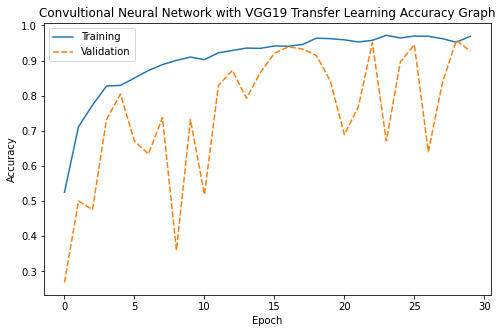

In [46]:
plot_model_performance(CNN_vgg_19_transfer_hist, 'Convultional Neural Network with VGG19 Transfer Learning', save=True)

In [47]:
train_loss, train_acc = CNN_vgg_19_transfer.evaluate(train_data, verbose=1)
valid_loss, valid_acc = CNN_vgg_19_transfer.evaluate(valid_data, verbose=1)

print(f'\n\nTraining Accuracy:\t{train_acc * 100}\nTraining Loss:\t\t{train_loss}\n')
print(f'Validation Accuracy:\t{valid_acc * 100}\nValidation Loss:\t{valid_loss}\n')
print('Train/Validation Diff:\t', np.abs(train_acc - valid_acc) * 100)

6/6 [==============================] - 8s 1s/step - loss: 0.1817 - accuracy: 0.9268


Training Accuracy:	91.60510301589966
Training Loss:		0.24164311587810516

Validation Accuracy:	92.68292784690857
Validation Loss:	0.1816868782043457

Train/Validation Diff:	 1.0778248310089111


Using InceptionV3

In [48]:
inception_v3 = InceptionV3(weights='imagenet', include_top=False, input_shape=None)

for layer in inception_v3.layers[:-1]:
    layer.trainable = False

In [49]:
CNN_inception_transfer = Sequential()

CNN_inception_transfer.add(data_augmentation)

CNN_inception_transfer.add(inception_v3)

CNN_inception_transfer.add(GlobalAveragePooling2D())

CNN_inception_transfer.add(Dense(256 , activation ='relu'))
CNN_inception_transfer.add(BatchNormalization())
CNN_inception_transfer.add(Dense(256 , activation ='relu'))
CNN_inception_transfer.add(BatchNormalization())

CNN_inception_transfer.add(Dense(9 , activation='softmax'))

CNN_inception_transfer.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics = ['accuracy'])

In [50]:
CNN_inception_transfer_hist = CNN_inception_transfer.fit(train_data, epochs=30, validation_data=valid_data, verbose=1)

Epoch 1/30
47/47 [==============================] - 19s 347ms/step - loss: 1.6054 - accuracy: 0.4889 - val_loss: 6.2957 - val_accuracy: 0.3780
Epoch 2/30
47/47 [==============================] - 16s 333ms/step - loss: 1.0108 - accuracy: 0.6373 - val_loss: 0.9375 - val_accuracy: 0.6768
Epoch 3/30
47/47 [==============================] - 16s 332ms/step - loss: 0.8330 - accuracy: 0.6911 - val_loss: 0.9408 - val_accuracy: 0.7134
Epoch 4/30
47/47 [==============================] - 16s 333ms/step - loss: 0.7965 - accuracy: 0.7099 - val_loss: 0.4407 - val_accuracy: 0.8232
Epoch 5/30
47/47 [==============================] - 16s 332ms/step - loss: 0.7179 - accuracy: 0.7535 - val_loss: 0.8140 - val_accuracy: 0.7073
Epoch 6/30
47/47 [==============================] - 16s 335ms/step - loss: 0.6535 - accuracy: 0.7690 - val_loss: 0.4851 - val_accuracy: 0.8293
Epoch 7/30
47/47 [==============================] - 16s 333ms/step - loss: 0.6126 - accuracy: 0.7690 - val_loss: 0.4791 - val_accuracy: 0.8293

In [51]:
CNN_inception_transfer.save('Data/CNN_inception_transfer.h5')

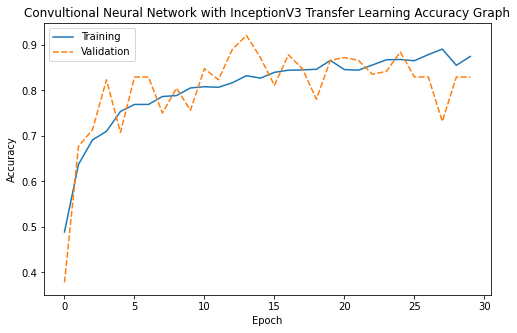

In [52]:
plot_model_performance(CNN_inception_transfer_hist, 'Convultional Neural Network with InceptionV3 Transfer Learning', save=True)

In [53]:
train_loss, train_acc = CNN_inception_transfer.evaluate(train_data, verbose=1)
valid_loss, valid_acc = CNN_inception_transfer.evaluate(valid_data, verbose=1)

print(f'\n\nTraining Accuracy:\t{train_acc * 100}\nTraining Loss:\t\t{train_loss}\n')
print(f'Validation Accuracy:\t{valid_acc * 100}\nValidation Loss:\t{valid_loss}\n')
print('Train/Validation Diff:\t', np.abs(train_acc - valid_acc) * 100)

6/6 [==============================] - 1s 239ms/step - loss: 0.3706 - accuracy: 0.8293


Training Accuracy:	82.06850290298462
Training Loss:		0.47656524181365967

Validation Accuracy:	82.92682766914368
Validation Loss:	0.3706296682357788

Train/Validation Diff:	 0.8583247661590576


Using ResNet50

In [54]:
resnet_50 = ResNet50(weights='imagenet', include_top=False, input_shape=None)

for layer in resnet_50.layers[:-1]:
    layer.trainable = False

In [55]:
CNN_resnet_transfer = Sequential()

CNN_resnet_transfer.add(data_augmentation)

CNN_resnet_transfer.add(resnet_50)

CNN_resnet_transfer.add(GlobalAveragePooling2D())

CNN_resnet_transfer.add(Dense(512 , activation ='relu'))
CNN_resnet_transfer.add(BatchNormalization())
CNN_resnet_transfer.add(Dense(256 , activation ='relu'))
CNN_resnet_transfer.add(BatchNormalization())

CNN_resnet_transfer.add(Dense(9 , activation='softmax'))

CNN_resnet_transfer.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [56]:
CNN_resnet_transfer_hist = CNN_resnet_transfer.fit(train_data, epochs=30, validation_data=valid_data, verbose=1)

Epoch 1/30
47/47 [==============================] - 47s 945ms/step - loss: 2.3059 - accuracy: 0.2243 - val_loss: 2.4589 - val_accuracy: 0.1159
Epoch 2/30
47/47 [==============================] - 44s 935ms/step - loss: 1.9281 - accuracy: 0.3103 - val_loss: 2.3578 - val_accuracy: 0.1220
Epoch 3/30
47/47 [==============================] - 44s 935ms/step - loss: 1.8021 - accuracy: 0.3506 - val_loss: 2.3676 - val_accuracy: 0.1585
Epoch 4/30
47/47 [==============================] - 44s 938ms/step - loss: 1.7481 - accuracy: 0.3700 - val_loss: 2.6554 - val_accuracy: 0.1524
Epoch 5/30
47/47 [==============================] - 44s 936ms/step - loss: 1.6887 - accuracy: 0.3962 - val_loss: 3.8184 - val_accuracy: 0.1220
Epoch 6/30
47/47 [==============================] - 44s 938ms/step - loss: 1.6481 - accuracy: 0.4083 - val_loss: 2.6794 - val_accuracy: 0.1707
Epoch 7/30
47/47 [==============================] - 44s 936ms/step - loss: 1.6514 - accuracy: 0.4030 - val_loss: 3.9969 - val_accuracy: 0.1220

In [57]:
CNN_resnet_transfer.save('Data/CNN_resnet_transfer.h5')

/Users/mahmoudahmed/opt/anaconda3/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


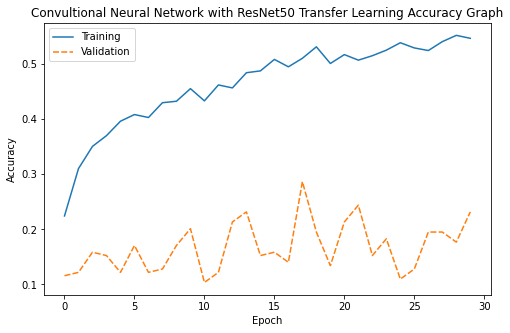

In [58]:
plot_model_performance(CNN_resnet_transfer_hist, 'Convultional Neural Network with ResNet50 Transfer Learning', save=True)

In [59]:
train_loss, train_acc = CNN_resnet_transfer.evaluate(train_data, verbose=1)
valid_loss, valid_acc = CNN_resnet_transfer.evaluate(valid_data, verbose=1)

print(f'\n\nTraining Accuracy:\t{train_acc * 100}\nTraining Loss:\t\t{train_loss}\n')
print(f'Validation Accuracy:\t{valid_acc * 100}\nValidation Loss:\t{valid_loss}\n')
print('Train/Validation Diff:\t', np.abs(train_acc - valid_acc) * 100)

6/6 [==============================] - 4s 682ms/step - loss: 4.0762 - accuracy: 0.2317


Training Accuracy:	18.200133740901947
Training Loss:		4.351138591766357

Validation Accuracy:	23.170731961727142
Validation Loss:	4.0762410163879395

Train/Validation Diff:	 4.970598220825195


---------
### Video Test ( Demo)

In [10]:
from PIL import Image
from keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json
import random
import cv2
from keras.models import load_model
import numpy as np
from datetime import datetime

from keras.preprocessing import image
model = load_model('CNN_inception_transfer.h5')   # change model


model_dict = {
    0: 'Adriana Lima',
    1: 'Alexandra Daddario',
    2: 'Alvaro Morte',
    3: 'Anne Hathaway',
    4: 'Anthony Mackie',
    5: 'Ben Affleck',
    6: 'Bill Gates',
    7: 'amber heard',
    8: 'barack obama',
    }



# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_extractor(img):
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

# Doing some Face Recognition with the webcam
# video_capture = cv2.VideoCapture(0)
video_capture = cv2.VideoCapture("Demo5.mp4")

while True:
    _, frame = video_capture.read()    
    face=face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (180, 180))
        im = Image.fromarray(face, 'RGB')
           #Resizing into 128x128 because we trained the model with this image size.
        img_array = np.array(im)
                    #Our keras model used a 4D tensor, (images x height x width x channel)
                    #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)[0]
        maxindex = int(np.argmax(pred))
        print(maxindex)
                     
        name="None matching"
        now = datetime.now()
        date = now.strftime("%d/%m/%Y %H:%M:%S")
        print(pred[maxindex])
        if pred[maxindex] > .4:
            name = model_dict[maxindex]
#         if(pred[0][3]>0.3):
        my_text = f"{name} - {date}"
            
        cv2.putText(frame,my_text, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    else:
        cv2.putText(frame,"No face found", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    try:    
        cv2.imshow('Video', frame)
    except:
        print("Video has ended.")
        video_capture.release()
        cv2.destroyAllWindows()
        break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

<>:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-10-d8edf5d2e57a>:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


4
0.7255395
8
0.7756942
8
0.8959393
8
0.5074189
8
0.83304936
8
0.65957963
4
0.55524844
8
0.61454827
4
0.6102775
4
0.4999092
8
0.50502527
8
0.5898132
8
0.5558318
8
0.7138594
8
0.5282551
8
0.87617326
8
0.8452465
8
0.7703584
8
0.85717905
8
0.9363042
8
0.37547153
3
0.8110499
3
0.811554
3
0.8103083
3
0.8117752
3
0.81046677
3
0.8090772
3
0.81046677
6
0.99974054
6
0.99973804
6
0.99996567
6
0.9981844
6
0.9999453
6
0.9996855
6
0.99996364
6
0.99994683
6
0.99938
6
0.9999403
6
0.9999378
6
0.6808181
6
0.99983037
6
0.957723
6
0.9999677
6
0.99996567
6
0.9998971
6
0.99715793
6
0.99834895
Video has ended.
